103.4301408
103
96.96670344
96


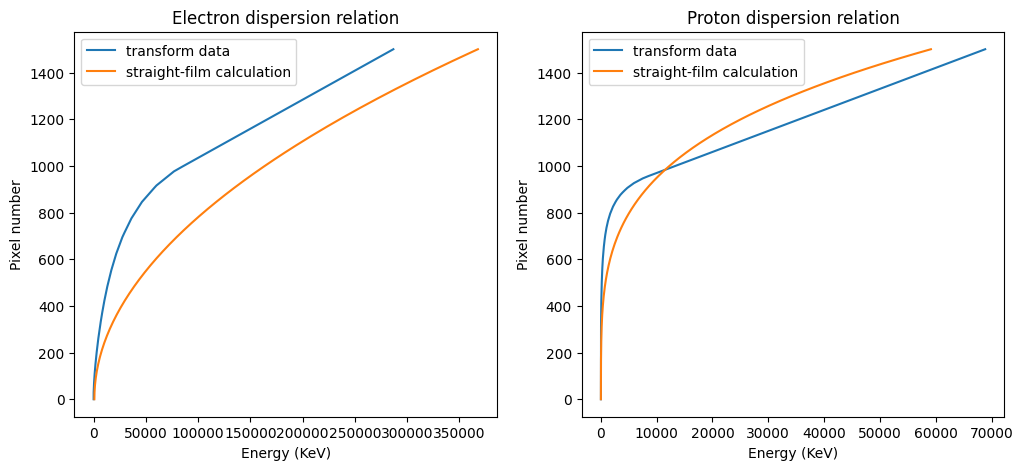

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

def lineout(array, w1, w2):
    width = np.shape(array)[0]
    length = np.shape(array)[1]
    line_data = array[w2,:]
    for i in range(length):
        line_data[i] = (1/(w2+1-w1))*np.sum(array[w1:w2+1,i])
    return line_data

def theoretical_dispersion(x,A,d):
    energy = A*(x**2+d**2)**2
    return energy

def theoretical_dispersion_relativistic_e(x,a,D):
    m = 9.1*10**-31
    c = 3*10**8
    E = m*c**2
    eV = 1.6*10**-19
    energy = (1/1000)*(1/eV)*0.5*(-E+np.sqrt(E**2+((eV*0.87*c)**2)*(1/D)*((((x-a)**2)+D)**2)))
    return energy

def theoretical_dispersion_relativistic_p(x,a,D):
    m = 1.67*10**-27
    c = 3*10**8
    E = m*c**2
    eV = 1.6*10**-19
    energy = (1/1000)*(1/eV)*0.5*(-E+np.sqrt(E**2+((eV*0.87*c)**2)*(1/D)*((((x-a)**2)+D)**2)))
    return energy

energy_data_protons = np.loadtxt('NEPPS_Dispersion_Protons_087T.txt', skiprows=1)
energy_data_electrons = np.loadtxt('NEPPS_Dispersion_Electrons_087T.txt', skiprows=1)

def linear_fit(x,m,c):
    y = m*x+c
    return y

def transform_electron_axis(x, R):
    energy = np.zeros(len(x))
    start = energy_data_electrons[-1,1]
    print(start)
    for i in range(len(x)):
        if np.abs((1/R)*x[i]-start) == np.min(np.abs((1/R)*x-start)):
            index = i
    print(index)
    energy[0:index] = np.interp((1/R)*x[0:index],np.array(energy_data_electrons[:,1]),np.array(energy_data_electrons[:,0]))

    deltax = energy_data_electrons[-1,1]-energy_data_electrons[-2,1]

    deltaE = energy_data_electrons[-1,0]-energy_data_electrons[-2,0]

    grad = deltaE/deltax

    intercept = energy_data_electrons[-1,0] - grad*energy_data_electrons[-1,1]

    energy[index:] = linear_fit((1/R)*x[index:], grad, intercept)

    return energy

def transform_proton_axis(x, R):
    energy = np.zeros(len(x))
    start = energy_data_protons[-1,1]
    print(start)
    for i in range(len(x)):
        if np.abs((1/R)*x[i]-start) == np.min(np.abs((1/R)*x-start)):
            index = i
    print(index)
    energy[0:index] = np.interp((1/R)*x[0:index],np.array(energy_data_protons[:,1]),np.array(energy_data_protons[:,0]))

    deltax = energy_data_protons[-1,1]-energy_data_protons[-2,1]

    deltaE = energy_data_protons[-1,0]-energy_data_protons[-2,0]

    grad = deltaE/deltax

    intercept = energy_data_protons[-1,0] - grad*energy_data_protons[-1,1]

    energy[index:] = linear_fit((1/R)*x[index:], grad, intercept)

    return energy


def find_index(axis,start,end):
    for i in range(len(axis)):
        if np.abs(axis[i]-start) == np.min(np.abs(axis-start)):
            start_i = i

    for i in range(len(axis)):
        if np.abs(axis[i]-end) == np.min(np.abs(axis-end)):
            end_i = i
    return start_i, end_i


r = 10

x_axis = np.linspace(0,1500,150)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(transform_electron_axis(x_axis,10),x_axis,label='transform data')
axs[0].plot(theoretical_dispersion_relativistic_e((1/10000)*x_axis,0.0,0.008**2),x_axis,label='straight-film calculation')
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Pixel number")
axs[0].set_title("Electron dispersion relation")
axs[0].legend()

axs[1].plot(transform_proton_axis(x_axis,10),x_axis,label='transform data')
axs[1].plot(theoretical_dispersion_relativistic_p((1/10000)*x_axis,0.001,0.012**2),x_axis,label='straight-film calculation')
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Pixel number")
axs[1].set_title("Proton dispersion relation")
axs[1].legend()

ther_, pcov_ = curve_fit(theoretical_dispersion, energy_data_electrons[:,1], energy_data_electrons[:,0], p0=[0.0028,5])

energy = theoretical_dispersion((1/10)*x_axis, ther_[0], ther_[1])

#axs[0].plot(energy,x_axis)

96.96670344
96
96.96670344
96
96.96670344
96
96.96670344
96


C:\Users\rayne\AppData\Local\Temp\ipykernel_25436\2276842577.py:30: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.array([0, 125, 250, 375, 500, 717, 789]), np.array([0, 0, 0, 0, 0, 0.0204, 0.0784]), 8)


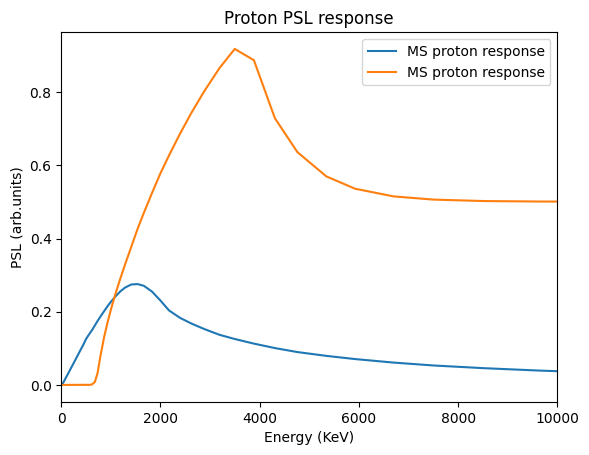

In [2]:
Proton_PSL_data = np.loadtxt('Proton_PSL_linylinx.txt', delimiter=',', skiprows=1)
Proton_PSL_data_low = np.loadtxt('Proton_PSL_low.txt', delimiter=',', skiprows=1)

TR_proton_energy_axis = 1000*Proton_PSL_data[:,0]
TR_proton_PSL_axis = Proton_PSL_data[:,1]

Proton_PSL_data = np.loadtxt('MS_Proton.txt', delimiter=',', skiprows=2)

MS_proton_energy_axis = 1000*Proton_PSL_data[:,0]
MS_proton_PSL_axis = Proton_PSL_data[:,1]

#plt.plot(TR_proton_energy_axis,TR_proton_PSL_axis)

#plt.plot(MS_proton_energy_axis,MS_proton_PSL_axis)

#plt.scatter(TR_proton_energy_axis,TR_proton_PSL_axis)

def find_exp_shift(E, A, a, shift):
    func = (A*np.exp(-a*E))+shift
    return func

def find_poly(E, A, a, shift):
    func = (A*E)**a+shift
    return func

def TR_proton_PSL_scale(Espace):
    PSL = np.interp(Espace,TR_proton_energy_axis,TR_proton_PSL_axis)
    return PSL

coefficients = np.polyfit(np.array([0, 125, 250, 375, 500, 717, 789]), np.array([0, 0, 0, 0, 0, 0.0204, 0.0784]), 8)

x = np.linspace(0,800,50)

poly_fit_MS = np.poly1d(coefficients)

#plt.plot(x,poly_fit_MS(x))

t_2, p_2 = curve_fit(find_exp_shift, np.linspace(4000,5000,100), np.interp(np.linspace(4000,5000,100),MS_proton_energy_axis,MS_proton_PSL_axis), p0=(1,0.0001,0.4))

fit_2 = find_exp_shift(np.linspace(4000,10000,100), t_2[0], t_2[1], t_2[2])

def MS_proton_PSL_scale(Espace):

    t_2, p_2 = curve_fit(find_exp_shift, np.linspace(4000,5000,100), np.interp(np.linspace(4000,5000,100),MS_proton_energy_axis,MS_proton_PSL_axis), p0=(1,0.0001,0.4))

    fit_2 = find_exp_shift(np.linspace(4000,10000,100), t_2[0], t_2[1], t_2[2])

    PSL = np.zeros(len(Espace))
    start = MS_proton_energy_axis[0]
    end = MS_proton_energy_axis[-1]
    
    for i in range(len(Espace)):
        if np.abs(Espace[i]-start) == np.min(np.abs(Espace-start)):
            start_index = i

    for i in range(len(Espace)):
        if np.abs(Espace[i]-end) == np.min(np.abs(Espace-end)):
            end_index = i

    PSL[start_index:end_index] = np.interp(Espace[start_index:end_index],MS_proton_energy_axis,MS_proton_PSL_axis)
    #PSL[:start_index] = MS_proton_PSL_axis[0]
    PSL[:start_index] = poly_fit_MS(Espace[:start_index])
    PSL[end_index:] = np.interp(Espace[end_index:],np.linspace(4000,10000,100),fit_2)

    return PSL

def find_exp(E, A, a):
    func = (A*np.exp(-a*E))
    return func

def find_2exp(E, A, a, B, b):
    func = func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))
    return func

def find_exp_proton(E, A, a, shift):
    func = (A*np.exp(-a*E))*TR_proton_PSL_scale(E)+shift
    return func

def find_2exp_proton(E, A, a, B, b, shift):
    func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))*TR_proton_PSL_scale(E)+shift
    return func

##############################################################

energy_data_protons = np.loadtxt('NEPPS_Dispersion_Protons_087T.txt', skiprows=1)
energy_data_electrons = np.loadtxt('NEPPS_Dispersion_Electrons_087T.txt', skiprows=1)

def dxdE_electrons(x_in):
    x_d = np.array(energy_data_electrons[:,1])
    E_d = np.array(energy_data_electrons[:,0])
    dxde_data = np.gradient(x_d,E_d)
    dxde = np.interp(0.1*x_in,x_d,dxde_data)
    return dxde

def dxdE_protons(x_in):
    x_data = np.array(energy_data_protons[:,1])
    E_data = np.array(energy_data_protons[:,0])
    dxde_data = np.gradient(x_data,E_data)
    dxde = np.interp(0.1*x_in,x_data,dxde_data)
    return dxde

plt.plot(transform_proton_axis(x_axis,10), TR_proton_PSL_scale(transform_proton_axis(x_axis,10)), label = 'MS proton response')

plt.plot(transform_proton_axis(x_axis,10), MS_proton_PSL_scale(transform_proton_axis(x_axis,10)), label = 'MS proton response')

#plt.plot(np.linspace(4000,10000,100),find_exp_shift(np.linspace(4000,10000,100), t[0], t[1], t[2]))


#plt.plot(x, fit1)

plt.xlim(0,10000)
plt.xlabel("Energy (KeV)")
plt.ylabel("PSL (arb.units)")
plt.title("Proton PSL response")
plt.legend()

Text(0.5, 1.0, 'MS Electron PSL response')

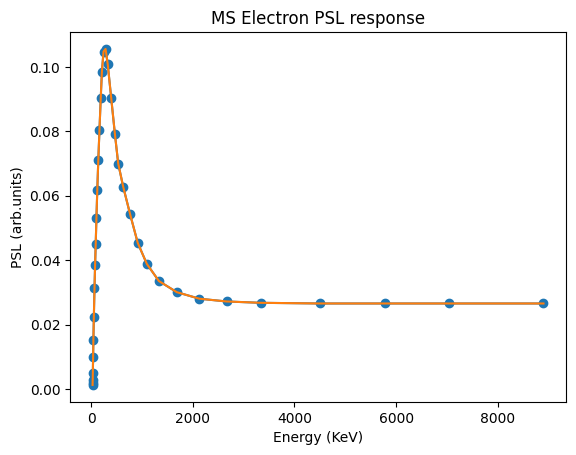

In [3]:
import numpy as np

MS_signal_data = np.loadtxt('MS_signal.txt', skiprows=1) # Adjust delimiter if needed
MS_energy_axis = 1000*MS_signal_data[:,0]
MS_PSL_axis = MS_signal_data[:,1]

plt.plot(MS_energy_axis,MS_PSL_axis)

def MS_PSL_scale(Espace):
    PSL = np.interp(Espace,MS_energy_axis,MS_PSL_axis)
    return PSL

def find_exp_electron(E, A, a, shift):
    func = (A*np.exp(-a*E))*MS_PSL_scale(E)+shift
    return func

def find_2exp_electron(E, A, a, B, b, shift):
    func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))*MS_PSL_scale(E)+shift
    return func

# Assuming your text file is named 'data.txt' and contains a 2D array
energy_data = np.loadtxt('Electron_Dispersion_Z_vs_Ebeam_0028T.txt', skiprows=8) # Adjust delimiter if needed

MS_signal_data = np.loadtxt('MS_signal.txt', skiprows=1) # Adjust delimiter if needed
MS_energy_axis = 1000*MS_signal_data[:,0]
MS_PSL_axis = MS_signal_data[:,1]

plt.plot(MS_energy_axis,MS_PSL_axis)
plt.scatter(MS_energy_axis,MS_PSL_axis)
plt.xlabel("Energy (KeV)")
plt.ylabel("PSL (arb.units)")
plt.title("MS Electron PSL response")
#plt.plot(transform_electron_axis(x_axis,10),MS_PSL_scale(transform_electron_axis(x_axis,10)))
#print(np.shape(energy_data[:,0]))
#print(np.shape(MS_energy_axis))
#plt.xlim([0,100000])
#print(np.shape(data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


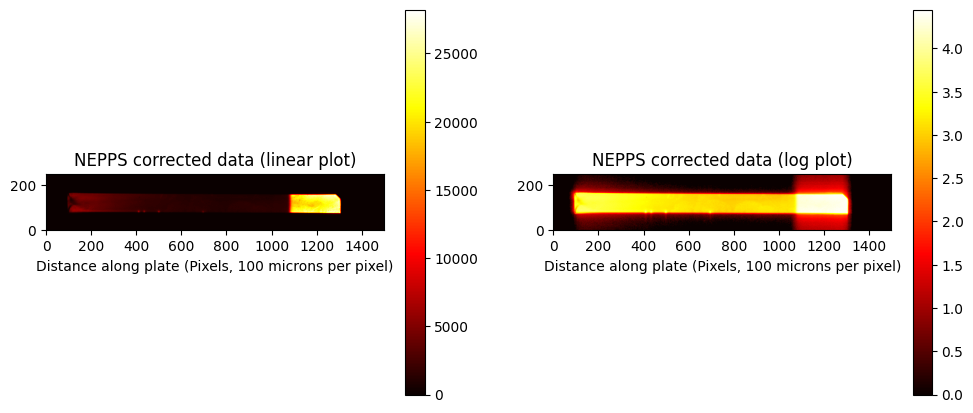

In [4]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE_1_SHOT_29.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    #print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PSL_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PSL_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')

NEPPS_1_29= shot_data
x_1_29_axis = x_axis

96.96670344
1065
994.1974
589
1005
[3.40638109e+03 4.15075039e-04 5.92750495e+01]
[3.40638217e+03 4.15075079e-04 5.92747588e+01]
Temperature 1 =  2409.202930559088
Temperature 2 =  154.88505362957443
Temperature 3 =  8775.735649405442
[8.61373629e+03 6.45640090e-03 4.98524155e+02 1.13950561e-04
 8.94621688e+02]
1169.677711062247


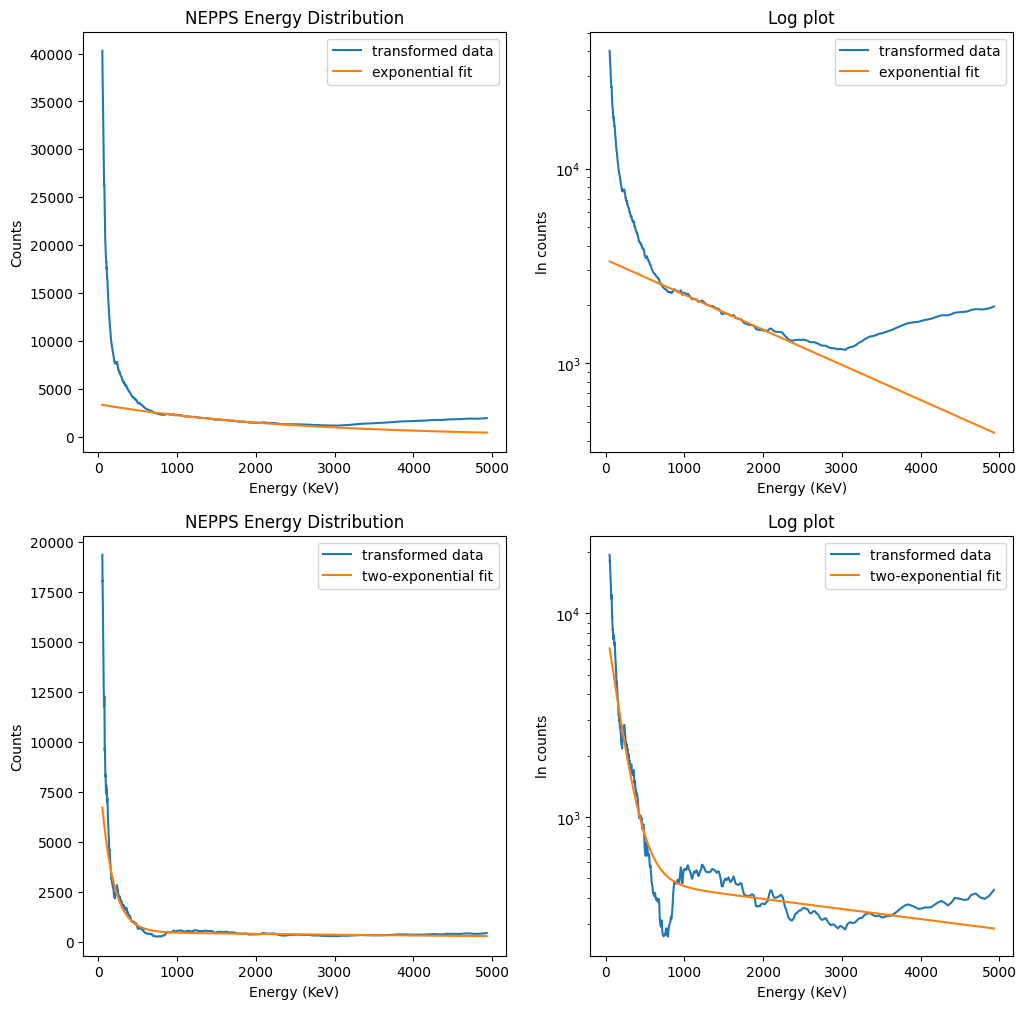

In [5]:
import numpy as np

edge = 95

line = lineout(NEPPS_1_29, 95, 150)
E_axis = transform_proton_axis(x_1_29_axis-edge,10)
#proton_PSL_scale = TR_proton_PSL_scale(E_axis)
proton_PSL_scale = MS_proton_PSL_scale(E_axis)

index = (np.append((np.append(np.linspace(391,420,29),np.linspace(426,449,23))),np.linspace(489,503,14))).astype(int)
E_axis_featureless = np.delete(E_axis,index, None)
line_featureless = np.delete(line,index, None)
proton = np.delete(proton_PSL_scale,index, None)

#plt.plot(E_axis_featureless,np.divide(line_featureless-1402,proton))

#plt.ylim([0,200000])
#plt.xlim([50,500])

#TR film analysis
#start_i, end_i = find_index(E_axis,50,1000)

#MS film analysis

start, end = find_index(E_axis,50,5000)

start_1, end_1 = find_index(E_axis,150,5000)

start_2, end_2 = find_index(E_axis,800,2000)

#############################################

signal_min = np.min(line[start_1:end_1])
print(signal_min)

print(start_1)
print(end_1)

ther_1, pcov_1 = curve_fit(find_exp_proton, E_axis[start_2:end_2], line[start_2:end_2], p0=[3e+4, 1.6e-3, 1e-1], bounds=(0, np.inf))
ther_1a, pcov_1a = curve_fit(find_exp_proton, E_axis[start_2:end_2], line[start_2:end_2], p0=[3e+4, 1.6e-3, 1e-1], bounds=(0, [np.inf,np.inf,0.9*signal_min]))
fit1 = find_exp_proton(E_axis, ther_1[0], ther_1[1], ther_1[2])
fit1_exp = find_exp(E_axis, ther_1[0], ther_1[1])
fit1a_exp = find_exp(E_axis, ther_1a[0], ther_1a[1])

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].plot(E_axis[start:end],np.divide((line[start:end]-ther_1a[2]),proton_PSL_scale[start:end]),label='transformed data')
axs[0,0].plot(E_axis[start:end],fit1a_exp[start:end],label='exponential fit')
axs[0,0].set_xlabel("Energy (KeV)")
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title("NEPPS Energy Distribution")
axs[0,0].legend()

axs[0,1].semilogy(E_axis[start:end],np.divide((line[start:end]-ther_1a[2]),proton_PSL_scale[start:end]),label='transformed data')
axs[0,1].semilogy(E_axis[start:end],fit1a_exp[start:end],label='exponential fit')
axs[0,1].set_xlabel("Energy (KeV)")
axs[0,1].set_ylabel("ln counts")
axs[0,1].set_title("Log plot")
axs[0,1].legend()

#plt.plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1[2]),proton_PSL_scale[start_i:end_i]))

#plt.plot(E_axis[start_i:end_i],fit1_exp[start_i:end_i])

#axs[1].plot(E_axis,np.divide((line-ther_1[2]),proton_PSL_scale))

#axs[1].plot(E_axis,fit1_exp)

#axs[1].set_ylim([-5000,120000])
#axs[1].set_xlim([0,30000])

#ther_2, pcov_2 = curve_fit(find_2exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[7*ther_1[0], 7*ther_1[1], 0.01*ther_1[0], 0.01*ther_1[1], ther_1[2]], bounds=(0, np.inf))
ther_2, pcov_2 = curve_fit(find_2exp_proton, E_axis[start_1:end_1], line[start_1:end_1], p0=[7*ther_1a[0], 7*ther_1a[1], 1*ther_1a[0], 1*ther_1a[1], ther_1a[2]], bounds=(0, [np.inf,np.inf,np.inf,np.inf,0.9*signal_min]))
#ther_1, pcov_1 = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[5e+05, 1e-02, 1e+02], bounds=(0, [np.inf,np.inf,signal_min]))
fit2 = find_2exp_proton(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3], ther_2[4])
fit2_exp = find_2exp(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3])

#3.34503749e+03 9.75020636e-04

#1.71337223e+23 6.29503998e-02

#axs[1].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),proton_PSL_scale[start_i:end_i]),label='transformed data')
#axs[1].plot(E_axis[start_i:end_i],fit2_exp[start_i:end_i],label='two-exponential fit')

axs[1,0].plot(E_axis[start:end],np.divide((line[start:end]-ther_2[4]),proton_PSL_scale[start:end]),label='transformed data')
axs[1,0].plot(E_axis[start:end],fit2_exp[start:end],label='two-exponential fit')
axs[1,0].set_xlabel("Energy (KeV)")
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title("NEPPS Energy Distribution")
axs[1,0].legend()

axs[1,1].semilogy(E_axis[start:end],np.divide((line[start:end]-ther_2[4]),proton_PSL_scale[start:end]),label='transformed data')
axs[1,1].semilogy(E_axis[start:end],fit2_exp[start:end],label='two-exponential fit')
axs[1,1].set_xlabel("Energy (KeV)")
axs[1,1].set_ylabel("ln counts")
axs[1,1].set_title("Log plot")
axs[1,1].legend()


print(ther_1)
print(ther_1a)

print("Temperature 1 = ", 1/ther_1[1])
print("Temperature 2 = ", 1/ther_2[1])
print("Temperature 3 = ", 1/ther_2[3])

print(ther_2)
print(np.min(np.divide(line[start_1:end_1]-ther_1[2],proton_PSL_scale[start_1:end_1])))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


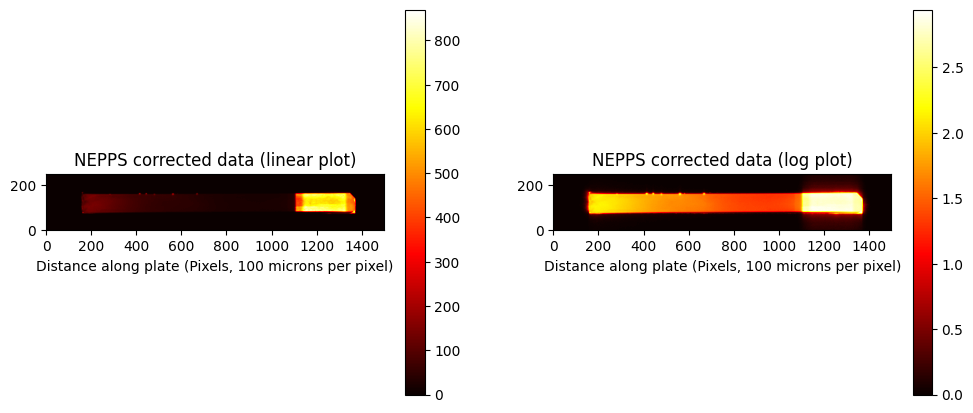

In [6]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE_7_SHOT_28.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    #print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PSL_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PSL_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')

NEPPS_7_28= shot_data
x_7_28_axis = x_axis

96.96670344
1129
19.780884
688
999
[3.40638109e+03 4.15075039e-04 5.92750495e+01]
[4.54213377e+02 8.02822239e-03 1.23261872e+01 6.78614220e-04
 1.78027954e+01]
Temperature 1 =  2409.202930559088
Temperature 2 =  124.56057540699463
Temperature 3 =  1473.591284996118
-173.98662464911547


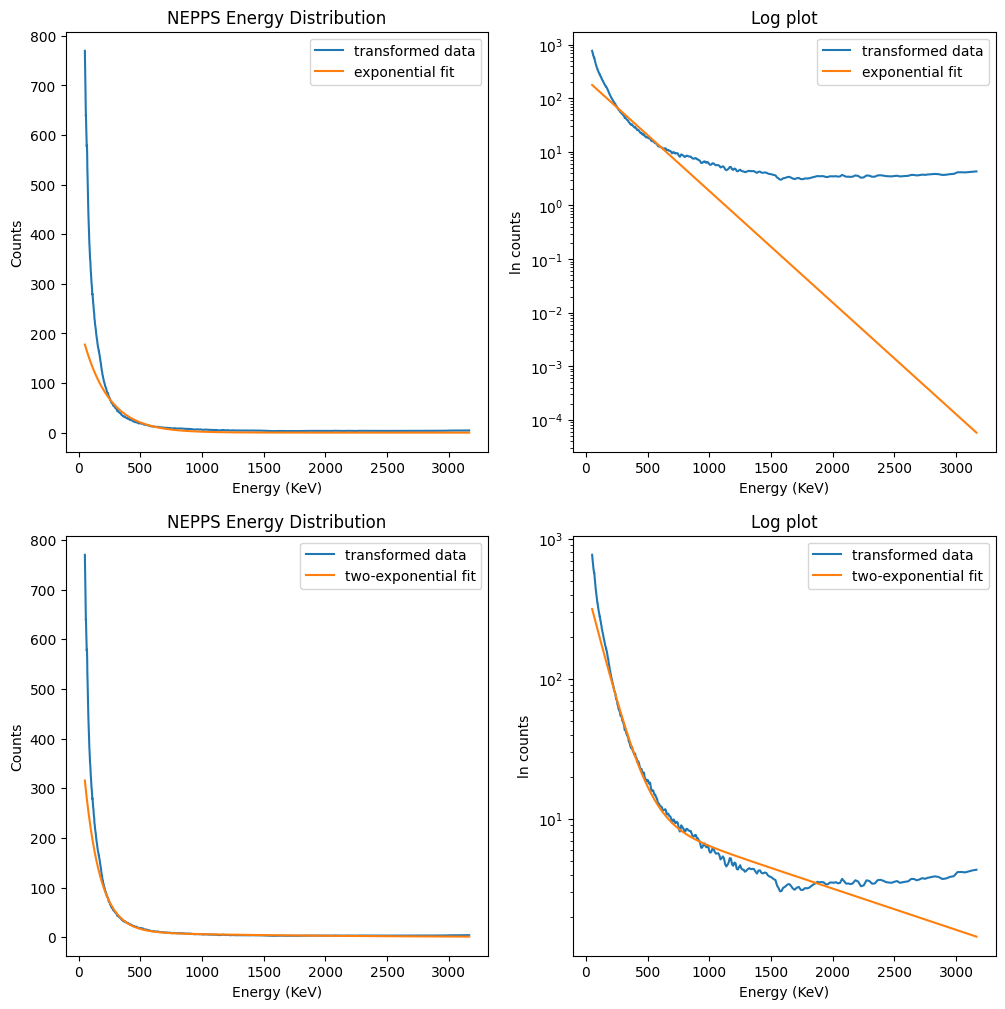

In [7]:
import numpy as np

edge = 159

line = lineout(NEPPS_7_28, 95, 150)
E_axis = transform_proton_axis(x_7_28_axis-edge,10)
proton_PSL_scale = MS_proton_PSL_scale(E_axis)

index = (np.append((np.append(np.linspace(391,420,29),np.linspace(426,449,23))),np.linspace(489,503,14))).astype(int)
E_axis_featureless = np.delete(E_axis,index, None)
line_featureless = np.delete(line,index, None)
proton = np.delete(proton_PSL_scale,index, None)

#plt.plot(E_axis_featureless,np.divide(line_featureless-1402,proton))

#plt.ylim([0,200000])
#plt.xlim([50,500])

start, end = find_index(E_axis,50,3200)

start_i, end_i = find_index(E_axis,200,2500)

#############################################

signal_min = np.min(line[start_i:end_i])
print(signal_min)

print(start_i)
print(end_i)

#ther_1, pcov_1 = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[7e+05, 4e-03, 1e+02], bounds=(0, np.inf))
ther_1a, pcov_1a = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[9.1e+2, 9.0e-03, 1e+0], bounds=(0, [np.inf,np.inf,0.9*signal_min]))
#fit1 = find_exp_proton(E_axis, ther_1[0], ther_1[1], ther_1[2])
#fit1_exp = find_exp(E_axis, ther_1[0], ther_1[1])
fit1a_exp = find_exp(E_axis, ther_1a[0], ther_1a[1])

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].plot(E_axis[start:end],np.divide((line[start:end]-0.9*signal_min),proton_PSL_scale[start:end]),label='transformed data')
axs[0,0].plot(E_axis[start:end],fit1a_exp[start:end],label='exponential fit')
#axs[0,0].plot(E_axis[start_1:end_1],find_exp(E_axis[start_1:end_1], 1e+3, 9.0e-3))
axs[0,0].set_xlabel("Energy (KeV)")
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title("NEPPS Energy Distribution")
axs[0,0].legend()

axs[0,1].semilogy(E_axis[start:end],np.divide((line[start:end]-ther_1a[2]),proton_PSL_scale[start:end]),label='transformed data')
axs[0,1].semilogy(E_axis[start:end],fit1a_exp[start:end],label='exponential fit')
axs[0,1].set_xlabel("Energy (KeV)")
axs[0,1].set_ylabel("ln counts")
axs[0,1].set_title("Log plot")
axs[0,1].legend()

#plt.plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1[2]),proton_PSL_scale[start_i:end_i]))

#plt.plot(E_axis[start_i:end_i],fit1_exp[start_i:end_i])

#axs[1].plot(E_axis,np.divide((line-ther_1[2]),proton_PSL_scale))

#axs[1].plot(E_axis,fit1_exp)

#axs[1].set_ylim([-5000,120000])
#axs[1].set_xlim([0,30000])

#ther_2, pcov_2 = curve_fit(find_2exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[7*ther_1[0], 7*ther_1[1], 0.01*ther_1[0], 0.01*ther_1[1], ther_1[2]], bounds=(0, np.inf))
ther_2, pcov_2 = curve_fit(find_2exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[1*ther_1a[0], 1*ther_1a[1], 0.8*ther_1a[0], 0.8*ther_1a[1], ther_1a[2]], bounds=(0, [np.inf,np.inf,np.inf,np.inf,0.9*signal_min]))
#ther_1, pcov_1 = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[5e+05, 1e-02, 1e+02], bounds=(0, [np.inf,np.inf,signal_min]))
fit2 = find_2exp_proton(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3], ther_2[4])
fit2_exp = find_2exp(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3])

#axs[1].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),proton_PSL_scale[start_i:end_i]),label='transformed data')
#axs[1].plot(E_axis[start_i:end_i],fit2_exp[start_i:end_i],label='two-exponential fit')

axs[1,0].plot(E_axis[start:end],np.divide((line[start:end]-ther_2[4]),proton_PSL_scale[start:end]),label='transformed data')
axs[1,0].plot(E_axis[start:end],fit2_exp[start:end],label='two-exponential fit')
axs[1,0].set_xlabel("Energy (KeV)")
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title("NEPPS Energy Distribution")
axs[1,0].legend()

axs[1,1].semilogy(E_axis[start:end],np.divide((line[start:end]-ther_2[4]),proton_PSL_scale[start:end]),label='transformed data')
axs[1,1].semilogy(E_axis[start:end],fit2_exp[start:end],label='two-exponential fit')
axs[1,1].set_xlabel("Energy (KeV)")
axs[1,1].set_ylabel("ln counts")
axs[1,1].set_title("Log plot")
#axs[1,1].set_ylim([10,10000])
axs[1,1].legend()


print(ther_1)
print(ther_2)

print("Temperature 1 = ", 1/ther_1[1])
print("Temperature 2 = ", 1/ther_2[1])
print("Temperature 3 = ", 1/ther_2[3])

print(np.min(np.divide(line[start_i:end_i]-ther_1[2],proton_PSL_scale[start_i:end_i])))